# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 參考顏色

In [2]:
dark_red = (192/255,80/255,77/255,1)
yolk = (253/255,186/255,33/255,1)
bar_blue = (79/255,129/255,189/255,1)

color_series1_2 = [(116/255,172/255,223/255,1),
                 (189/255,192/255,219/255,1),
                 (79/255,115/255,140/255,1),
                 (158/255,158/255,38/255,1),
                 (125/255,199/255,128/255,1),
                 (204/255,250/255,125/255,1),
                 (246/255,180/255,14/255,1),]

color_series1 = [(116/255,172/255,223/255,1),
                 (40/255,135/255,200/255,1),
                 (23/255,70/255,79/255,1),
                 (158/255,158/255,38/255,1),
                 (125/255,199/255,128/255,1),
                 (204/255,250/255,125/255,1),
                 (246/255,180/255,14/255,1),]

color_series1_3 = [(116/255,172/255,223/255,1),
                 (2/255,95/255,182/255,1),
                 (23/255,70/255,79/255,1),
                 (158/255,158/255,38/255,1),
                 (125/255,199/255,128/255,1),
                 (204/255,250/255,125/255,1),
                 (246/255,180/255,14/255,1),]

# final table
color_series1_4 = [(116/255,172/255,223/255,1),
                 (2/255,95/255,182/255,1),
                 (0/255,101/255,92/255,1),
                 (158/255,158/255,38/255,1),
                 (125/255,199/255,128/255,1),
                 (204/255,250/255,125/255,1),
                 (246/255,180/255,14/255,1),]

color_series2 = [(79/255,129/255,189/255,1),
                 (176/255,193/255,232/255,1),
                 (248/255,150/255,216/255,1),
                 (225/255,102/255,118/255,1),
                 (224/255,11/255,40/255,1),
                 (245/255,138/255,7/255,1),
                 (253/255,186/255,33/255,1),]



# 演算法：按照energy efficiency 排序

In [3]:
def permutate(a):
    zp = np.array( list( zip(a, [2,6,3,4,1,5,7])) )
    new_order = sorted(zp, key=(lambda x:x[1]))
    return(np.array(new_order)[:,0])

or_algo_order = ['LR','kNN', 'SVM', 'RF', 'XGB', 'NN1', 'NN5']
new_algo_order = permutate(or_algo_order)

# New Figure 2a
 - accuracy of MRSA and Tri

In [4]:
# a specific figure for Acc

def figure_2_new_acc(mrsa_mean, mrsa_ci_max, tri_mean, tri_ci_max, color_series = color_series1,filename = None):
    mean_zp = list( zip(mrsa_mean, tri_mean) )
    mrsa_ci = [mrsa_ci_max[i] - mrsa_mean[i] for i in range(len(mrsa_ci_max))]
    tri_ci = [(tri_ci_max[i] - tri_mean[i]) for i in range(len(tri_ci_max))]
    ci_zp = list( zip(mrsa_ci, tri_ci) )
    algo = new_algo_order
    x = np.arange(2)
    # 有多少個類型，只需更改n即可
                                                         
    total_width, n = 0.9, 7
    width = total_width / n
    # 重新擬定x的座標
    x = x - (total_width - width) / 2
    # 這裡使用的是偏移
    plt.figure(dpi=350)
    for i in range(len(mrsa_mean)):
        plt.bar(x + width*i, mean_zp[i], yerr= ci_zp[i], width=width, label=algo[i], capsize = 3, align = 'center', color = color_series[i])

    plt.xlabel('Datasets')
    plt.ylabel('Accuracy(%)')

    axes = plt.gca()
    axes.set_ylim([60, 90])
    axes.set_title('Classification accuracies of different algorithms')

    plt.xticks([0,1], ['Mass spectrometry', 'Urinalysis'])

    plt.legend(loc='upper left', ncol=3, fontsize='small')
#     plt.show()
    if filename != None:
        plt.savefig(filename, dpi=300)

    


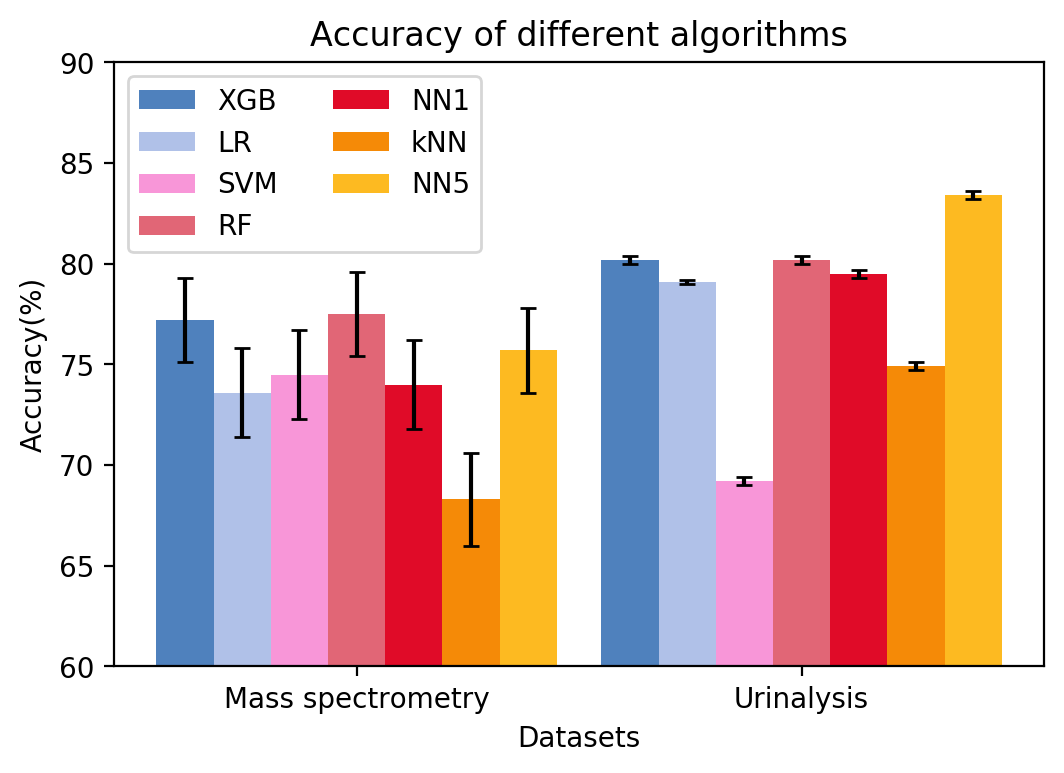

In [40]:
#accuracy of MRSA and Trichomonas
original_MRSA_acc = [73.6, 68.3, 74.5, 77.5, 77.2, 74.0, 75.7]
original_tri_acc = [79.1, 74.9, 69.2, 80.2, 80.2, 79.5, 83.4]
or_MRSA_acc_ci_max  = [75.8, 70.6, 76.7, 79.6, 79.3, 76.2, 77.8]
or_Tri_acc_ci_max  = [79.2, 75.1, 69.4, 80.4, 80.4, 79.7, 83.6]

new_MRSA_acc = permutate(original_MRSA_acc)
new_tri_acc = permutate(original_tri_acc)
new_MRSA_acc_max = permutate(or_MRSA_acc_ci_max)
new_tri_acc_max = permutate(or_Tri_acc_ci_max)

figure_2_new_acc(new_MRSA_acc, new_MRSA_acc_max, new_tri_acc, new_tri_acc_max)


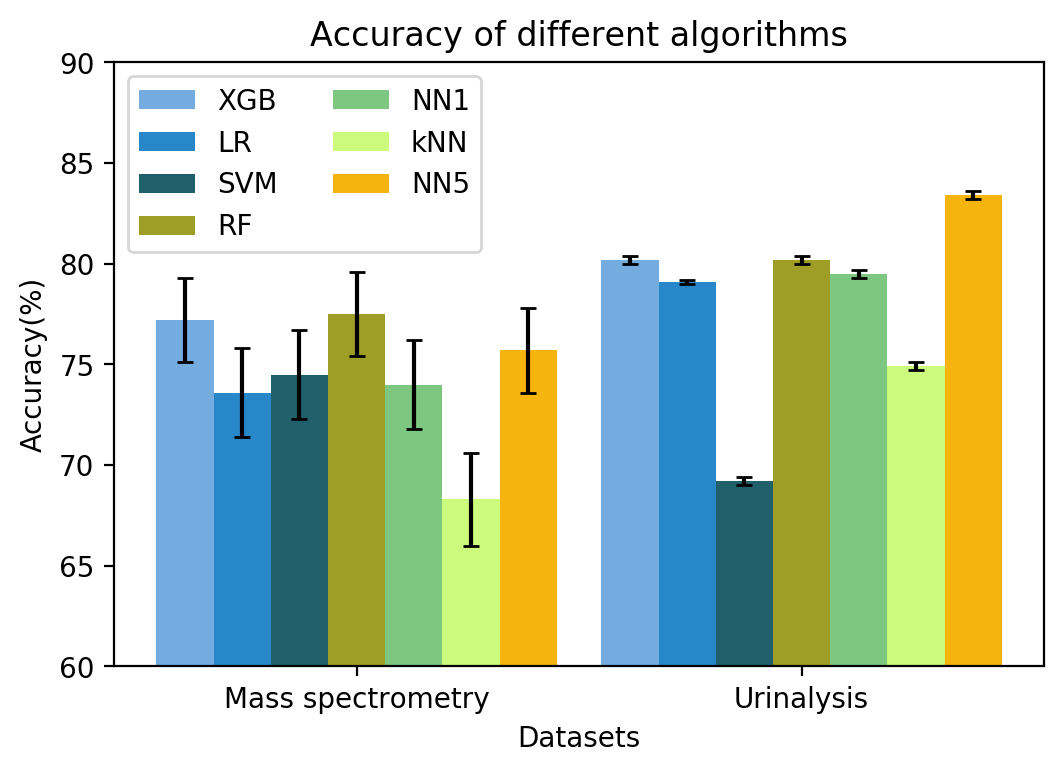

In [25]:
#accuracy of MRSA and Trichomonas
original_MRSA_acc = [73.6, 68.3, 74.5, 77.5, 77.2, 74.0, 75.7]
original_tri_acc = [79.1, 74.9, 69.2, 80.2, 80.2, 79.5, 83.4]
or_MRSA_acc_ci_max  = [75.8, 70.6, 76.7, 79.6, 79.3, 76.2, 77.8]
or_Tri_acc_ci_max  = [79.2, 75.1, 69.4, 80.4, 80.4, 79.7, 83.6]

new_MRSA_acc = permutate(original_MRSA_acc)
new_tri_acc = permutate(original_tri_acc)
new_MRSA_acc_max = permutate(or_MRSA_acc_ci_max)
new_tri_acc_max = permutate(or_Tri_acc_ci_max)

figure_2_new_acc(new_MRSA_acc, new_MRSA_acc_max, new_tri_acc, new_tri_acc_max)


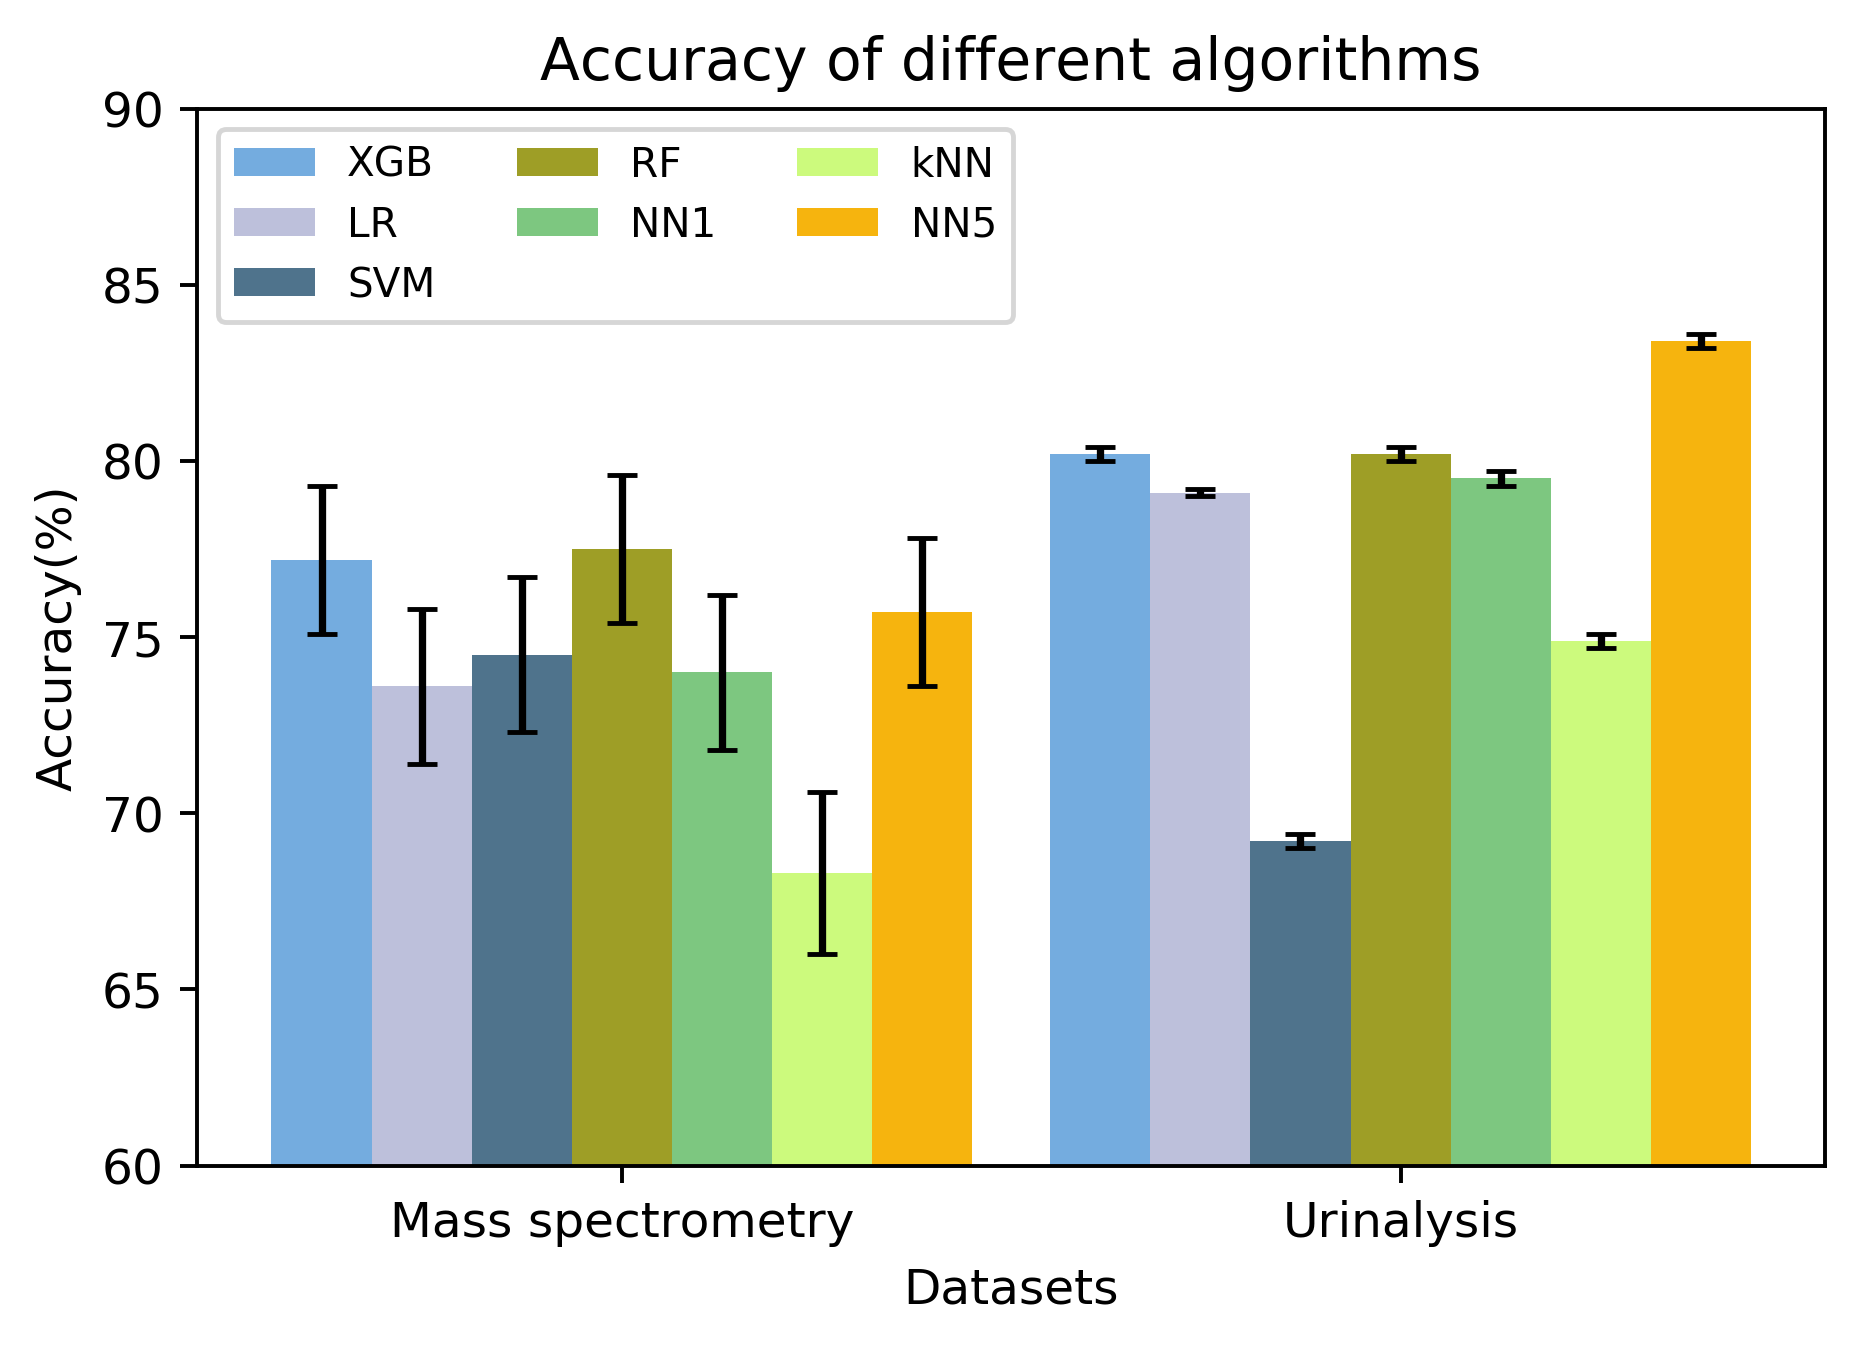

<Figure size 432x288 with 0 Axes>

In [5]:
#accuracy of MRSA and Trichomonas
original_MRSA_acc = [73.6, 68.3, 74.5, 77.5, 77.2, 74.0, 75.7]
original_tri_acc = [79.1, 74.9, 69.2, 80.2, 80.2, 79.5, 83.4]
or_MRSA_acc_ci_max  = [75.8, 70.6, 76.7, 79.6, 79.3, 76.2, 77.8]
or_Tri_acc_ci_max  = [79.2, 75.1, 69.4, 80.4, 80.4, 79.7, 83.6]

new_MRSA_acc = permutate(original_MRSA_acc)
new_tri_acc = permutate(original_tri_acc)
new_MRSA_acc_max = permutate(or_MRSA_acc_ci_max)
new_tri_acc_max = permutate(or_Tri_acc_ci_max)

figure_2_new_acc(new_MRSA_acc, new_MRSA_acc_max, new_tri_acc, new_tri_acc_max, color_series = color_series1_2, filename = 'figure2a.jpg')


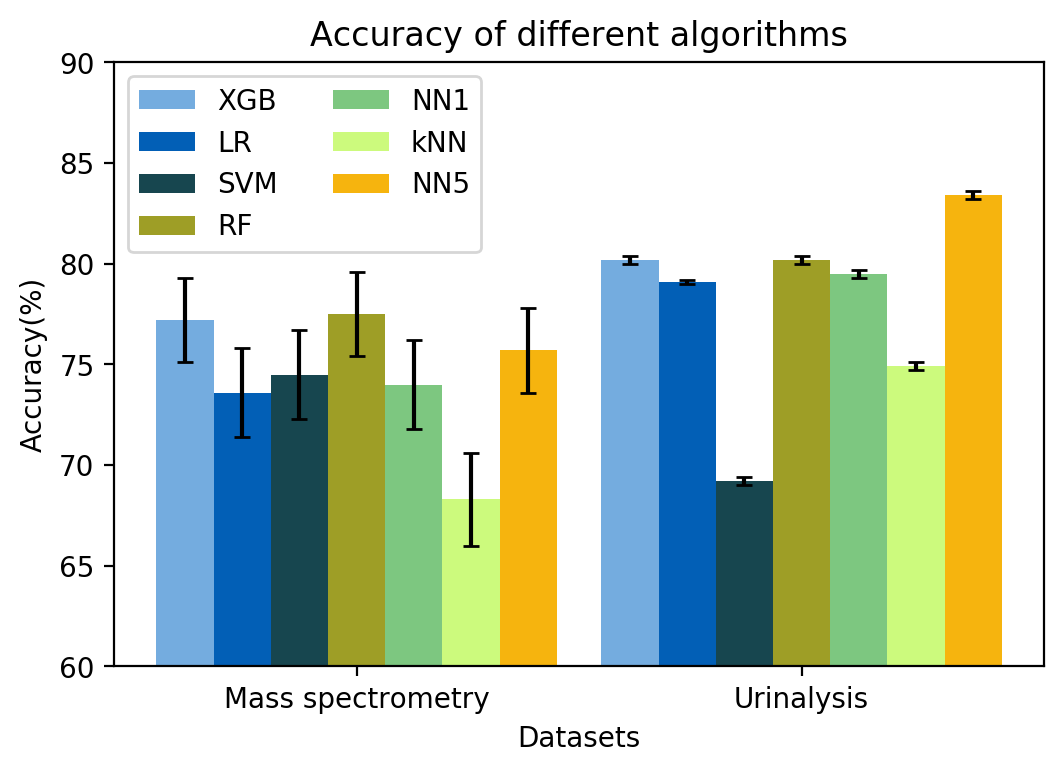

In [27]:
#accuracy of MRSA and Trichomonas
original_MRSA_acc = [73.6, 68.3, 74.5, 77.5, 77.2, 74.0, 75.7]
original_tri_acc = [79.1, 74.9, 69.2, 80.2, 80.2, 79.5, 83.4]
or_MRSA_acc_ci_max  = [75.8, 70.6, 76.7, 79.6, 79.3, 76.2, 77.8]
or_Tri_acc_ci_max  = [79.2, 75.1, 69.4, 80.4, 80.4, 79.7, 83.6]

new_MRSA_acc = permutate(original_MRSA_acc)
new_tri_acc = permutate(original_tri_acc)
new_MRSA_acc_max = permutate(or_MRSA_acc_ci_max)
new_tri_acc_max = permutate(or_Tri_acc_ci_max)

figure_2_new_acc(new_MRSA_acc, new_MRSA_acc_max, new_tri_acc, new_tri_acc_max, color_series = color_series1_3)


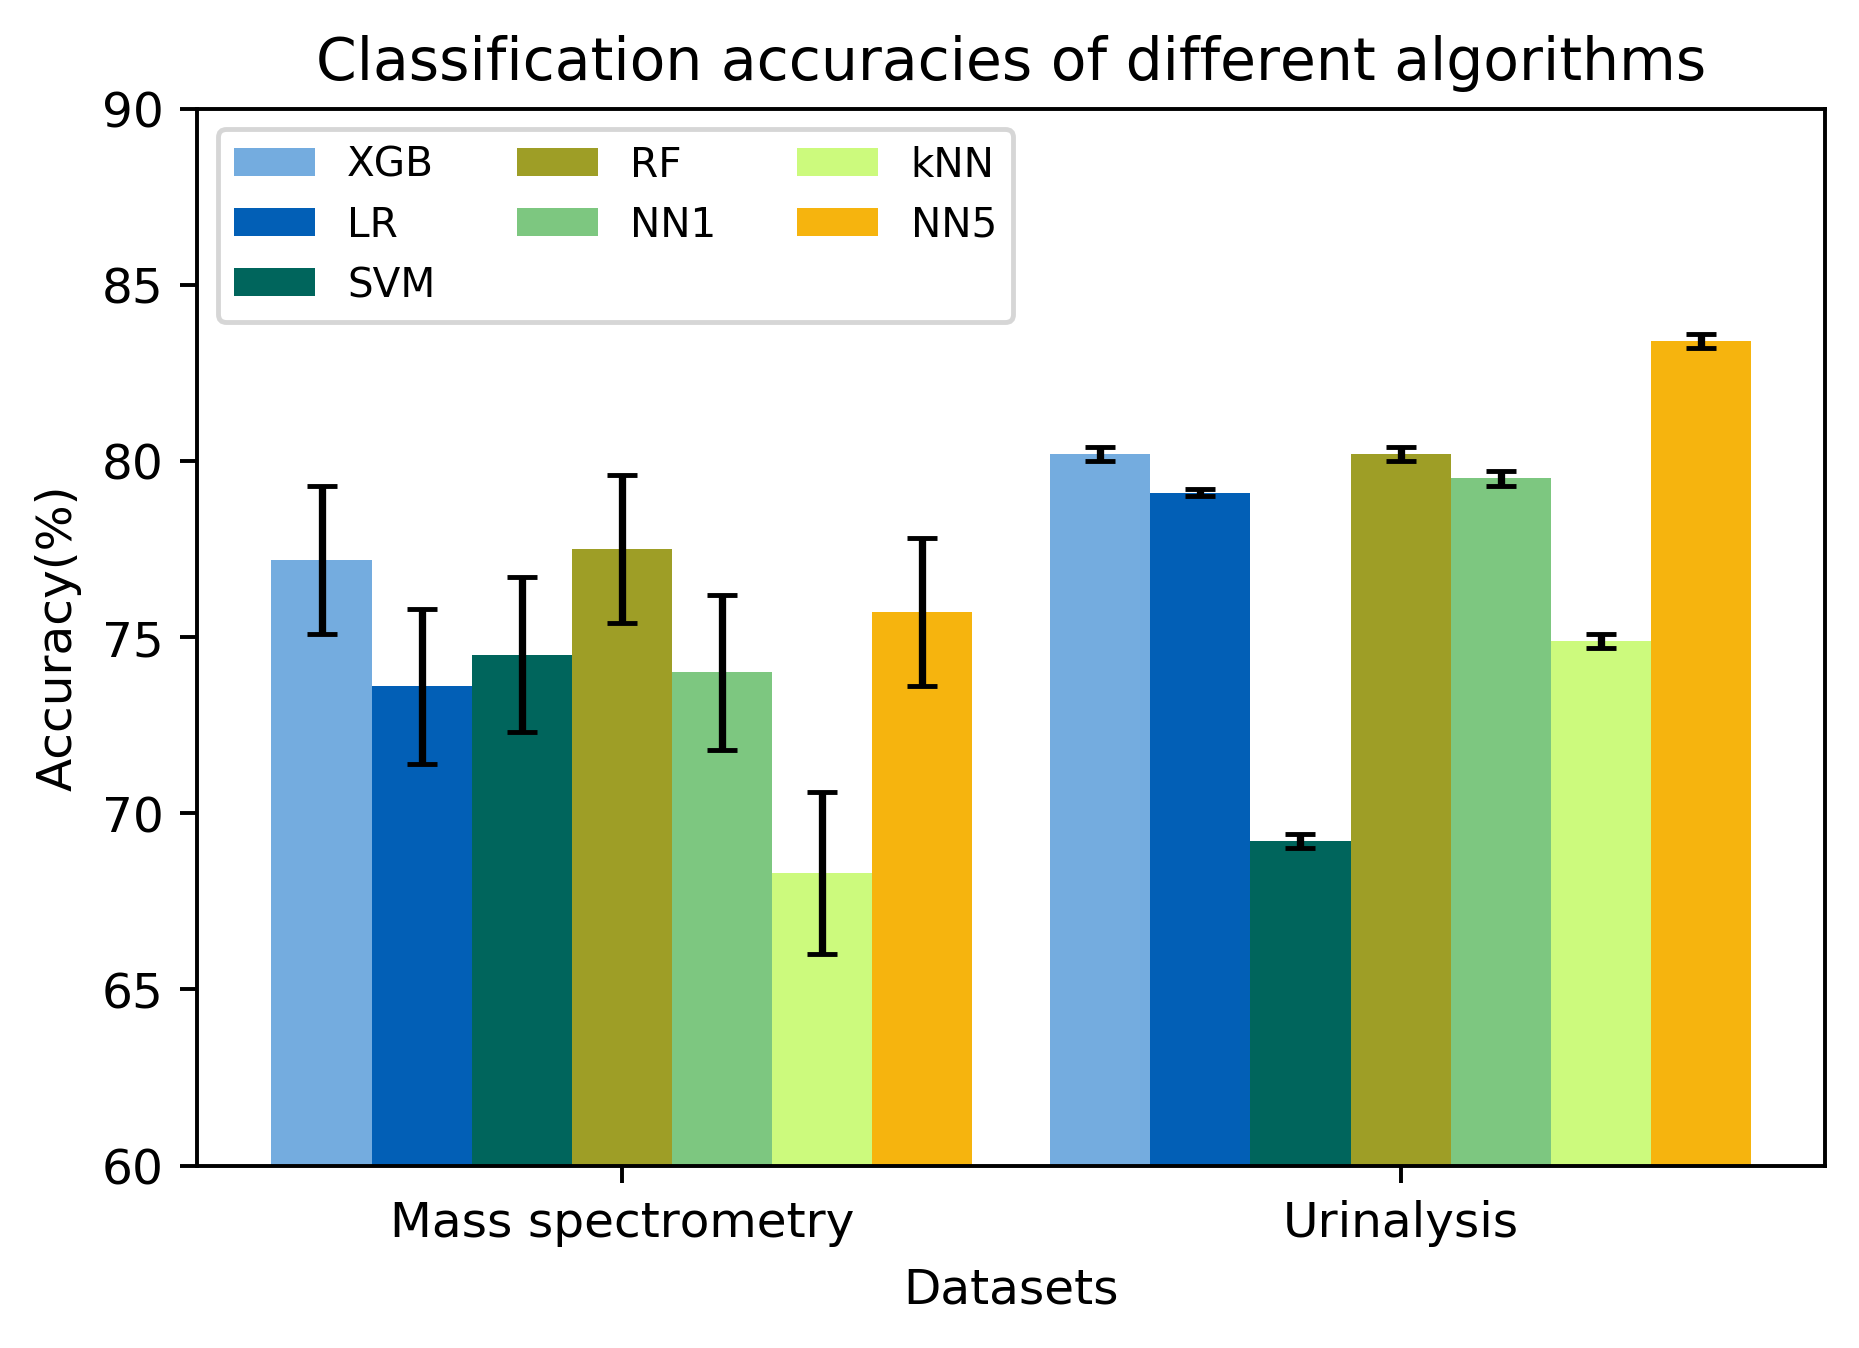

In [7]:
#accuracy of MRSA and Trichomonas
original_MRSA_acc = [73.6, 68.3, 74.5, 77.5, 77.2, 74.0, 75.7]
original_tri_acc = [79.1, 74.9, 69.2, 80.2, 80.2, 79.5, 83.4]
or_MRSA_acc_ci_max  = [75.8, 70.6, 76.7, 79.6, 79.3, 76.2, 77.8]
or_Tri_acc_ci_max  = [79.2, 75.1, 69.4, 80.4, 80.4, 79.7, 83.6]

new_MRSA_acc = permutate(original_MRSA_acc)
new_tri_acc = permutate(original_tri_acc)
new_MRSA_acc_max = permutate(or_MRSA_acc_ci_max)
new_tri_acc_max = permutate(or_Tri_acc_ci_max)

figure_2_new_acc(new_MRSA_acc, new_MRSA_acc_max, new_tri_acc, new_tri_acc_max, color_series = color_series1_4, filename = 'figure2a.jpg')

plt.savefig('figure2.jpg', dpi=300, format = 'jpg')

# New Figure 2b
 - AUC with confidence interval

In [6]:
# a specific figure for AUC

def figure_2_new_auc(mrsa_mean, mrsa_ci_max, tri_mean, tri_ci_max, color_series = color_series1, filename = None):
    mean_zp = list( zip(mrsa_mean, tri_mean) )
    mrsa_ci = [mrsa_ci_max[i] - mrsa_mean[i] for i in range(len(mrsa_ci_max))]
    tri_ci = [(tri_ci_max[i] - tri_mean[i]) for i in range(len(tri_ci_max))]
    ci_zp = list( zip(mrsa_ci, tri_ci) )
    algo = new_algo_order
    x = np.arange(2)

    # 有多少個類型，只需更改n即可
    total_width, n = 0.9, 7
    width = total_width / n
    # 重新擬定x的座標
    x = x - (total_width - width) / 2
    # 這裡使用的是偏移
    plt.figure(dpi=350)
    for i in range(len(mrsa_mean)):
        plt.bar(x + width*i, mean_zp[i], yerr= ci_zp[i], width=width, label=algo[i], capsize = 3, align = 'center', color = color_series[i])

    plt.xlabel('Datasets')
    plt.ylabel('AUROC(%)')

    axes = plt.gca()
    axes.set_ylim([50, 100])
    axes.set_title('AUROC of different algorithms')

    plt.xticks([0,1] ,['Mass spectrometry','Urinalysis'])

    plt.legend(loc='upper left', ncol=3, fontsize='small')
#     plt.show()
    if filename != None:
        plt.savefig(filename, dpi=300)



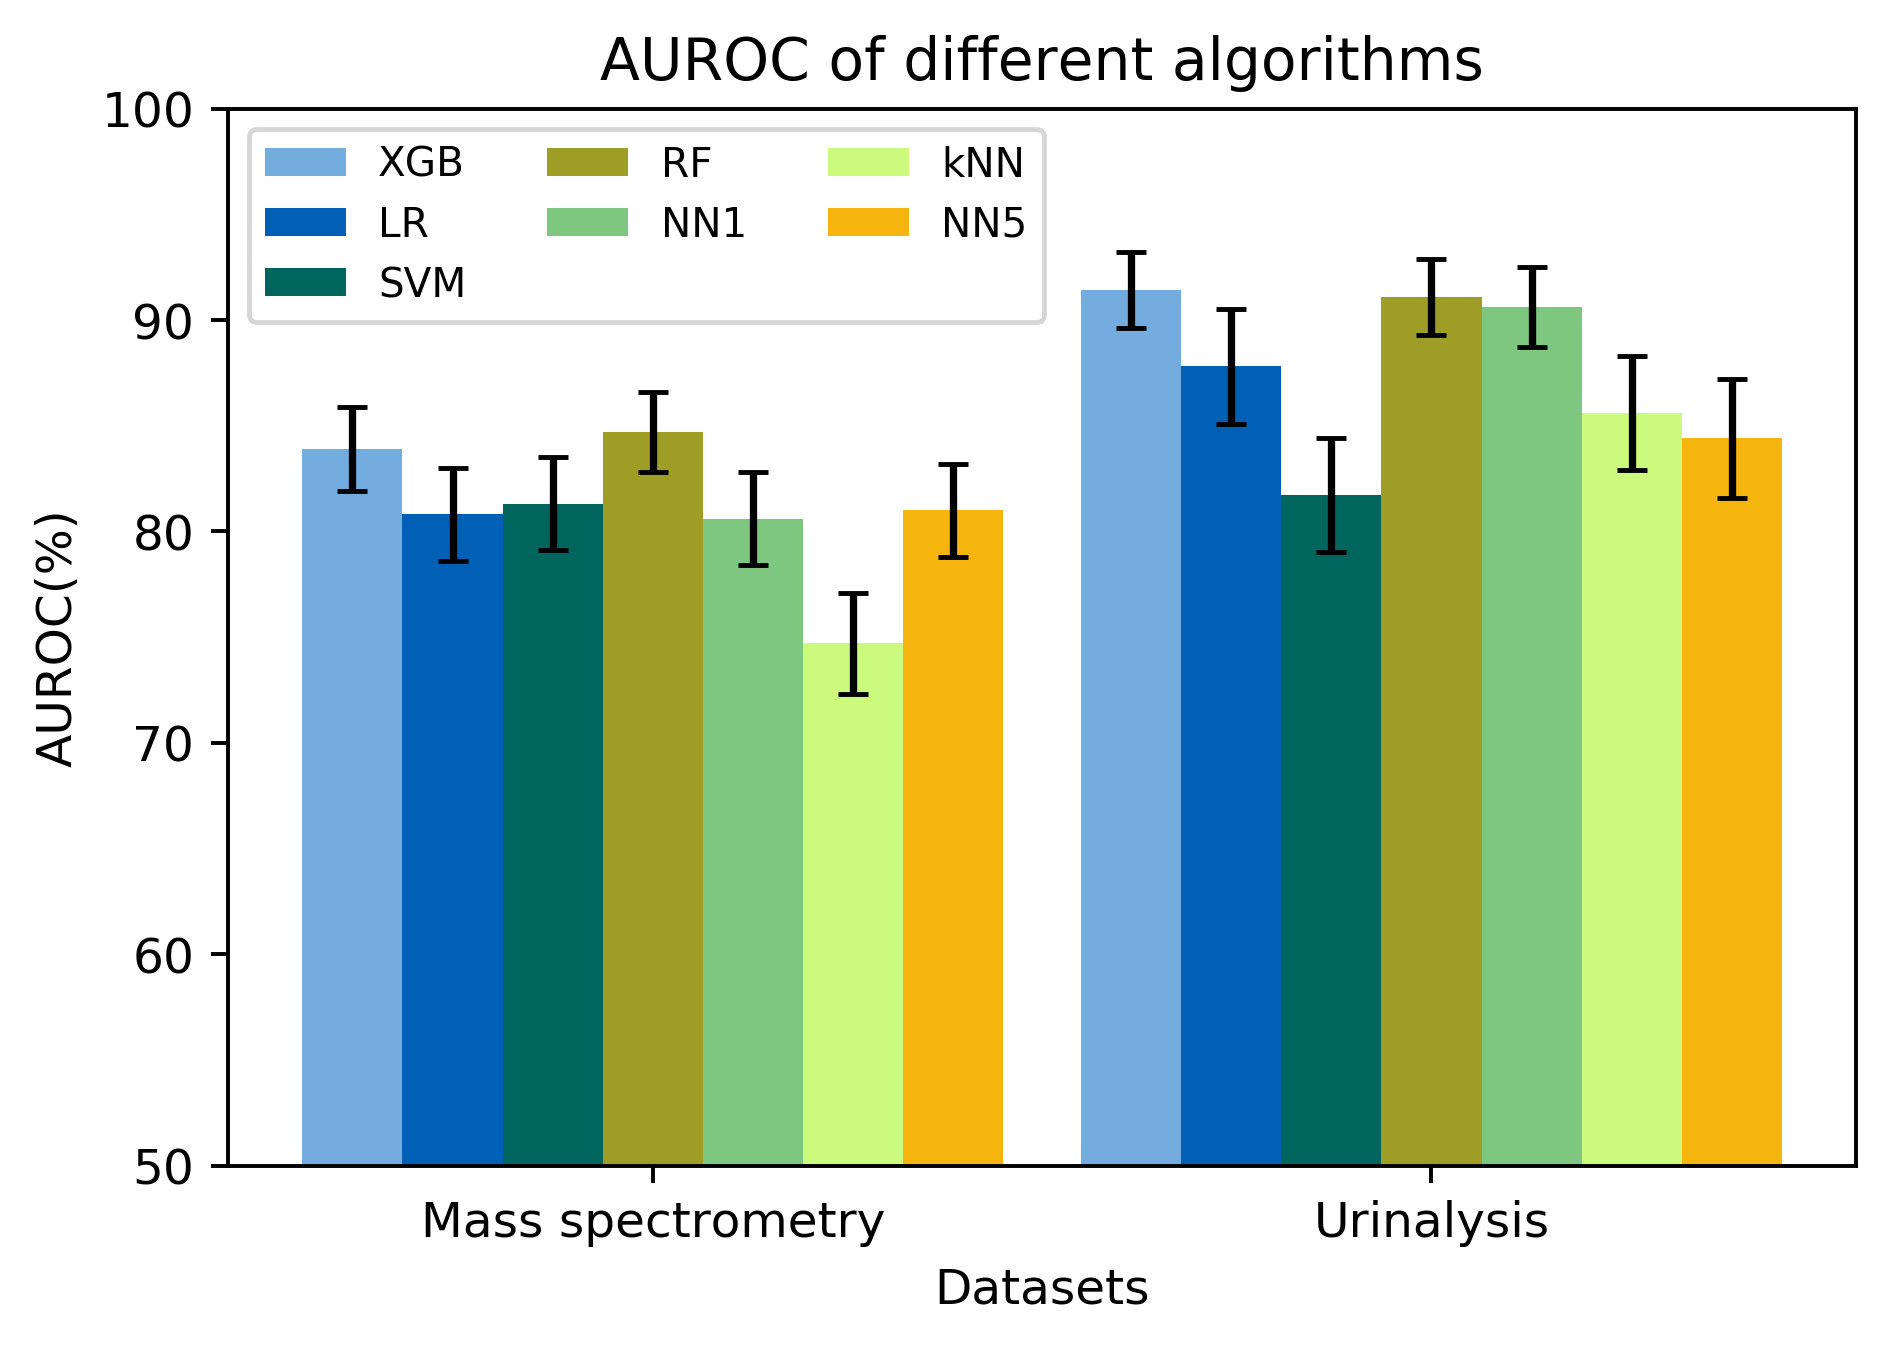

In [7]:
# AUC
or_MRSA_auc_avg = [80.8, 74.7, 81.3, 84.7, 83.9, 80.6, 81.0]
or_MRSA_auc_ci_max  = [83.0, 77.1, 83.5, 86.6, 85.9, 82.8, 83.2]
or_Tri_auc_avg = [87.8, 85.6, 81.7, 91.1, 91.4, 90.6, 84.4]
or_Tri_auc_ci_max  = [90.5, 88.3, 84.4, 92.9, 93.2, 92.5, 87.2]

new_MRSA_auc_avg = permutate(or_MRSA_auc_avg)
new_MRSA_auc_ci_max  = permutate(or_MRSA_auc_ci_max)
new_Tri_auc_avg = permutate(or_Tri_auc_avg)
new_Tri_auc_ci_max  = permutate(or_Tri_auc_ci_max)


figure_2_new_auc(new_MRSA_auc_avg, new_MRSA_auc_ci_max,
        new_Tri_auc_avg, new_Tri_auc_ci_max, color_series = color_series1_4, filename = 'figure2b.png')